In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv(r"D:\ExceLR Solution\Assignments\Recommendation System\anime.csv") 

In [3]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.shape 

(12294, 7)

In [5]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

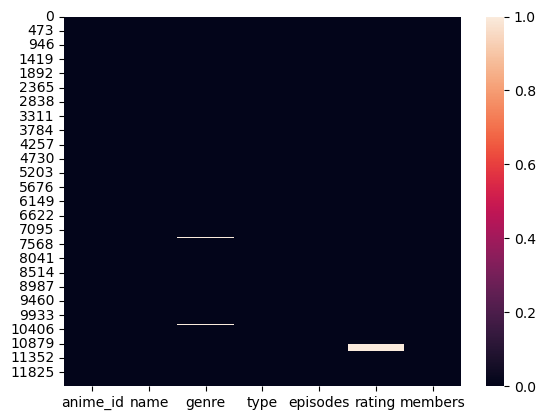

In [7]:
sns.heatmap(df.isnull())
plt.show() 

#### Handle Episodes feature data type error 

In [8]:
df[df['episodes']=='Unknown']  

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,Unknown,NaN,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [9]:
df['episodes'] = df['episodes'].apply(lambda x : 0 if x=='Unknown' else x)  

In [10]:
df=  df.astype({'episodes':int})

#### Handeling Missing values 

In [11]:
df.isnull().sum()  

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [12]:
df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes      int32
rating      float64
members       int64
dtype: object

In [13]:
mean_of_rating = df['rating'].mean()

In [14]:
df['rating'] =df['rating'].fillna(mean_of_rating)

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.isnull().sum() 

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [17]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [18]:
df['name']=df['name'].apply(lambda x : x.lower()) 

In [19]:
df['genre']=df['genre'].apply(lambda x : x.lower()) 

In [20]:
df['type'].value_counts()

type
TV         3777
OVA        3310
Movie      2306
Special    1674
ONA         655
Music       488
Name: count, dtype: int64

In [21]:
df = pd.get_dummies(data=df,columns=['type'],dtype=int)

In [22]:
df.shape 

(12210, 12)

In [23]:
df.head()

,anime_id,name,genre,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,kimi no na wa.,"drama, romance, school, supernatural",1,9.37,200630,1,0,0,0,0,0
1,5114,fullmetal alchemist: brotherhood,"action, adventure, drama, fantasy, magic, mili...",64,9.26,793665,0,0,0,0,0,1
2,28977,gintama°,"action, comedy, historical, parody, samurai, s...",51,9.25,114262,0,0,0,0,0,1
3,9253,steins;gate,"sci-fi, thriller",24,9.17,673572,0,0,0,0,0,1
4,9969,gintama&#039;,"action, comedy, historical, parody, samurai, s...",51,9.16,151266,0,0,0,0,0,1


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tf_genre = TfidfVectorizer() 

In [26]:
genre_arr = tf_genre.fit_transform(df['genre']).toarray() 

In [27]:
remain_col_arr = df.drop(['anime_id','name','genre'],axis=1).to_numpy()  

In [28]:
print(genre_arr.shape)
print(remain_col_arr.shape)

(12210, 47)
(12210, 9)


In [29]:
final_df = pd.DataFrame(np.concatenate((remain_col_arr,genre_arr),axis=1)) 

In [30]:
final_df['name'] = df['name']

In [31]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,name
0,1.0,9.37,200630.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.544252,0.000000,0.0,0.0,0.0,kimi no na wa.
1,64.0,9.26,793665.0,0.0,0.0,0.0,0.0,0.0,1.0,0.294553,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,fullmetal alchemist: brotherhood
2,51.0,9.25,114262.0,0.0,0.0,0.0,0.0,0.0,1.0,0.250498,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,gintama°
3,24.0,9.17,673572.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.834369,0.0,0.0,0.0,steins;gate
4,51.0,9.16,151266.0,0.0,0.0,0.0,0.0,0.0,1.0,0.250498,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,gintama&#039;


In [33]:
cols = list(final_df.columns)[:-1]

In [34]:
pt = pd.pivot_table(data=final_df,values=cols,index='name')

In [35]:
pt 

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,1.0,5.040000,191.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
"&quot;aesop&quot; no ohanashi yori: ushi to kaeru, yokubatta inu",1.0,6.670000,130.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
&quot;bungaku shoujo&quot; kyou no oyatsu: hatsukoi,26.0,7.060000,50480.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
&quot;bungaku shoujo&quot; memoire,3.0,7.540000,18013.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
&quot;bungaku shoujo&quot; movie,1.0,7.630000,40984.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zumomo to nupepe,1.0,6.473902,8350.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.508056,0.0,0.0,0.0,0.0
zutto mae kara suki deshita.: kokuhaku jikkou iinkai,1.0,7.470000,35058.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
üks uks,1.0,3.890000,114.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [36]:
feature_vec = pt.to_numpy()

In [37]:
np.where(pt.index=='ēldlive')[0][0]

12124

In [38]:
new = feature_vec[12124]

In [39]:
new

array([  0.        ,   6.47390169, 872.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [41]:
from sklearn.neighbors import NearestNeighbors 

In [42]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(feature_vec)  

NearestNeighbors(algorithm='brute', metric='cosine')

In [43]:
knn.kneighbors([new])

(array([[3.33066907e-16, 1.30373809e-06, 1.30935867e-06, 1.34709880e-06,
         1.34766550e-06]]),
 array([[12124,  9550,   550,  2408, 12115]], dtype=int64))

In [44]:
def suggetion(anime_name):
    sugg_amine = []
    anime_index = np.where(pt.index==anime_name)[0][0]
    distances, indices = knn.kneighbors([feature_vec[anime_index]])
    for i in indices[0][1:]:
        sugg_amine.append(pt.index[i]) 
    return sugg_amine  

In [45]:
suggetion('ēldlive')

['shin koihime†musou ova omake',
 'aoki uru',
 'dragon collection',
 'zou no inai doubutsuen']

### Interview Questions 

1. Can you explain the difference between user-based and item-based collaborative filtering? 

--> 
 * User-Based Collaborative Filtering
 
Approach: Recommends items to a user based on the preferences of similar users.
How it works: Finds users who have similar tastes to the target user by comparing their ratings or interactions with items. Then, it suggests items that these similar users have liked.

Example: If User A and User B both like the same movies, and User A likes a new movie that User B hasn’t seen, the system will recommend that new movie to User B.

    
*  Item-Based Collaborative Filtering

Approach: Recommends items to a user based on the similarity between items.
How it works: Finds items that are similar to the ones the target user has liked or interacted with. Then, it suggests these similar items to the user.

Example: If a user likes a particular movie, the system will recommend other movies that are similar in genre, director, or user ratings.

2. What is collaborative filtering, and how does it work?

--> 

Collaborative filtering is a technique used by recommender systems to suggest items to users based on the preferences and behaviors of other users. The core idea is that users who have agreed in the past will agree in the future, and users will like items that similar users have liked.

* How It Works : 
  * Data Collection:
        The system collects data on user interactions with items. This can include ratings, purchases, clicks, or any other form of user feedback.
        
  * User-Item Matrix:
    The collected data is organized into a user-item matrix, where rows represent users and columns represent items. Each cell in the matrix indicates the interaction (e.g., rating) between a user and an item.

  * Similarity Calculation:
    The system calculates the similarity between users or items. Common similarity measures include Pearson correlation, cosine similarity, and Euclidean distance.
    
   * User-Based Filtering: Similarity is calculated between users.
     Item-Based Filtering: Similarity is calculated between items.
     
   * Neighborhood Selection:
     Based on the similarity scores, the system identifies a set of similar users (user-based) or similar items (item-based).

    * Prediction and Recommendation:
      The system predicts the user’s rating for an item by aggregating the ratings of similar users or items.
      
* Types of Collaborative Filtering
  * User-Based Collaborative Filtering:
    Recommends items to a user based on the preferences of similar users.
     Example: If User A and User B have similar tastes, and User A likes a new movie, the system will recommend that movie to User B.
     
   * Item-Based Collaborative Filtering:

     Recommends items to a user based on the similarity between items.
     Example: If a user likes a particular book, the system will recommend other books that are similar in genre or author.
     
* Advantages

  * Personalization: Provides highly personalized recommendations.
  * Scalability: Item-based filtering can be more scalable with a large number of users.

* Disadvantages
    * Cold Start Problem: Struggles with new users or items with no interaction history.
    * Data Sparsity: Requires a large amount of user interaction data to be effective.
    * Collaborative filtering is widely used in various applications, including e-commerce (Amazo